In [33]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"IMDB Dataset.csv")

In [34]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [36]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
doc = np.array(['Hi my name is BLEHHH',
               'I am feeling very BLEH',
               'But i am also having a little fun'])
bag = count.fit_transform(doc)
print(count.vocabulary_)

{'hi': 8, 'my': 11, 'name': 12, 'is': 9, 'blehhh': 3, 'am': 1, 'feeling': 5, 'very': 13, 'bleh': 2, 'but': 4, 'also': 0, 'having': 7, 'little': 10, 'fun': 6}


In [37]:
bag.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [38]:
d1= 'The food is great'
d2= 'Staff is behaviour is great'
d3= 'Ambience can be better'
d4= 'Cuisine varieties are great'
doc = np.array([d1,d2,d3,d4])

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(doc)

In [41]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X.toarray())

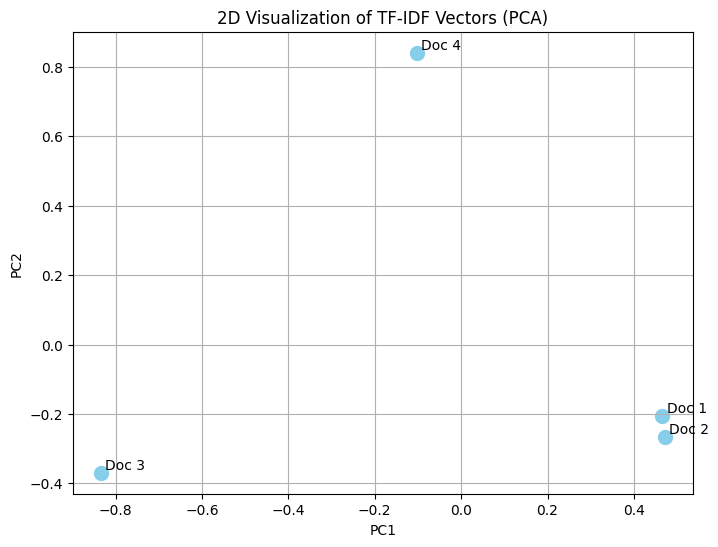

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', s=100)

for i, txt in enumerate(doc):
    plt.annotate(f'Doc {i+1}', (X_pca[i, 0]+0.01, X_pca[i, 1]+0.01), fontsize=10)

plt.title("2D Visualization of TF-IDF Vectors (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [43]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [44]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [45]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [46]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [47]:
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [48]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text) # remove numbers/symbols
    tokens = nltk.word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

In [49]:
data['clean_review'] = data['review'].apply(clean_text)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(data['clean_review'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

In [52]:
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [54]:
print(" TF-IDF + Logistic Regression")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

 TF-IDF + Logistic Regression
Accuracy: 0.889
Confusion Matrix:
 [[4334  627]
 [ 483 4556]]
